# Healy chapter 8 figures (2022-09-03)

_by A. Maurits van der Veen_  

_Modification history:_  
_2022-08-20 - Initial version_  
_2022-09-03 - Clean-up_  

This notebook provides python code to parallel the R code in Healy's Data Visualization book. 

It uses the `plotnine` module in python, which replicates most of ggplot.


## 0. General preparation

The code relies on several python modules, which may need to be installed first. To do so, uncomment the next X code snippets.

- `plotnine` is the main module replicating ggplot
- `mizani` provides axis label formatting
- `pyreadr` reads R-format datasets
- `adjustText` is used to move text around to avoid overlapping (alternative to ggrepel)
- `rpy2` makes it possible to execute R code within a python notebook
- `joypy` produces ridge plots (like ggridges)
- `patchworklib` produces compound charts


In [1]:
# !pip install plotnine


In [2]:
# !pip install mizani


In [3]:
# !pip install pyreadr


In [4]:
# !pip install adjustText


In [5]:
# !pip install rpy2


In [6]:
# !pip install joypy


In [7]:
# !pip install patchworklib


In [8]:
import math
import numpy as np

import pandas as pd
# import geopandas as gpd  # Necessary only for maps

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import patchworklib as pw

from plotnine import *  # alternative: import plotnine as p9 and always use prefix
from mizani.formatters import currency_format, percent_format, comma_format, date_format
from mizani.breaks import date_breaks

import adjustText

import pyreadr

import rpy2

import joypy

<Figure size 72x72 with 0 Axes>

## Chapter 8 - Refine your plots

The headings below correspond to chapter sections in the book (and share the same titles). 

Note that there are a number of figures before the first chapter section heading.

In [9]:
localfolder = '/Users/yourname/Downloads/'  # Change to local path


In [10]:
# Retrieve and load data used in this chapter

remotefolder = 'https://github.com/kjhealy/socviz/blob/master/data/'

datasetname = 'asasec'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
asasec = newdata[datasetname]

datasetname = 'organdata'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
organdata = newdata[datasetname]

datasetname = 'county_data'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
county_data = newdata[datasetname]

datasetname = 'gss_lon'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
gss_lon = newdata[datasetname]

datasetname = 'fredts'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
fredts = newdata[datasetname]

datasetname = 'yahoo'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
yahoo = newdata[datasetname]

datasetname = 'studebt'
targetfile = datasetname + '.rda'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
studebt = newdata[datasetname]

#### Charts that come before the 8.1 section heading

In [11]:
# Note: scale_x_continuous needs a float (integers are discrete)
asasec['Members'] = asasec['Members'].astype('float')

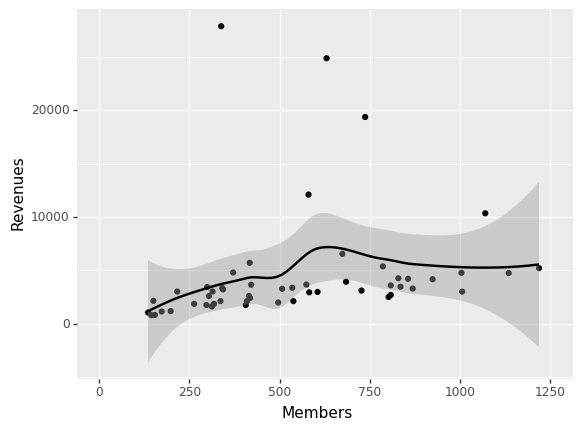

<ggplot: (312949757)>

In [12]:
# Figure 8.1
# Note the addition of 'group = 1',
# as well as the explicit specification of major tick marks on the x-axis
# Note, too, that if we don't explicitly tell it to (which the book code doesn't), 
# the x-axis does not start at 0, which is a bit deceptive

p = ggplot(data = asasec[asasec['Year'] == 2014],
           mapping = aes(x = 'Members', y = 'Revenues', label = 'Sname'))

p + geom_point() + geom_smooth(group = 1) +\
    scale_x_continuous(breaks=range(0, 1500, 250), minor_breaks=[], limits=[0, 1250])


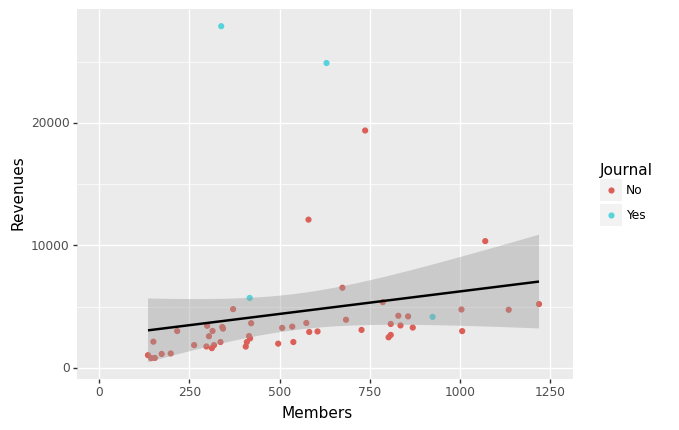

<ggplot: (323464945)>

In [13]:
# Figure 8.2, first part

p + geom_point(mapping = aes(color = 'Journal')) + \
    geom_smooth(method = 'lm', group = 1) + \
    scale_x_continuous(breaks=range(0, 1500, 250), minor_breaks=[], limits=[0, 1250])


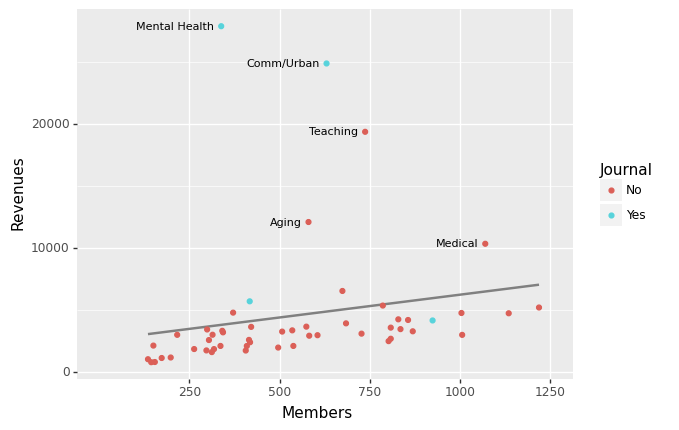

<ggplot: (323517401)>

In [14]:
# Figure 8.2, with labels

(p + geom_smooth(method = 'lm', se = False, color = 'gray', group = 1) +
     geom_point(mapping = aes(color = 'Journal')) +
     geom_text(data = asasec[(asasec['Year'] == 2014) & \
                             (asasec['Revenues'] > 7000)],
               ha = 'right', nudge_x = -20, size = 8) +
     scale_x_continuous(breaks=range(250, 1500, 250), minor_breaks=[], limits=[0, 1250]) 
)

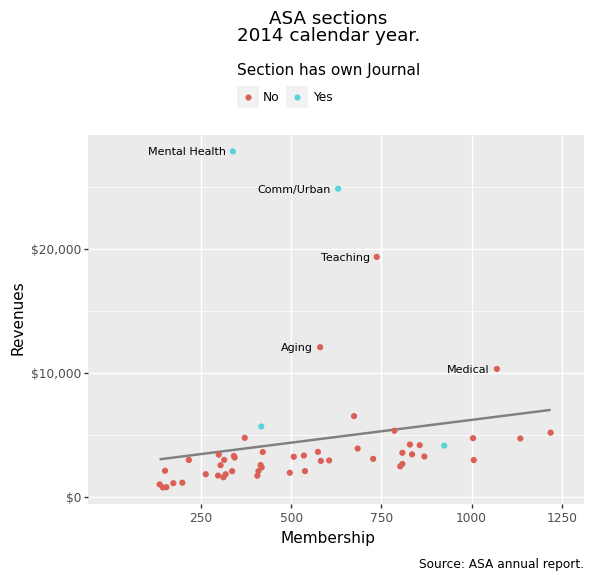

<ggplot: (323565053)>

In [15]:
# Figure 8.3
# Notes: 
# - putting legend on top overlaps title unless we add a bunch of newlines
#   to the title

asasec['MembersX'] = asasec['Members'].astype('float')

p = ggplot(data = asasec[asasec['Year'] == 2014],
           mapping = aes(x = 'MembersX', y = 'Revenues', label = 'Sname'))

# Save plot into a variable; we'll return to it for figure 8.8
p4 = \
(p + geom_smooth(method = 'lm', se = False, color = 'gray', group = 1) +
     geom_point(mapping = aes(color = 'Journal')) +
     geom_text(data = asasec[(asasec['Year'] == 2014) & \
                             (asasec['Revenues'] > 7000)],
               ha = 'right', nudge_x = -20, size = 8) +
     labs(x = 'Membership', y = 'Revenues',
          color = 'Section has own Journal\n',
          title = 'ASA sections\n2014 calendar year.\n\n\n\n\n',
          caption = 'Source: ASA annual report.') +
     scale_y_continuous(labels = currency_format(digits=0, big_mark=',')) +
     scale_x_continuous(breaks=range(250, 1500, 250), minor_breaks=[], limits=[0, 1250]) +
     theme(legend_position = 'top')
)

p4

### 8.1 Use color to your advantage

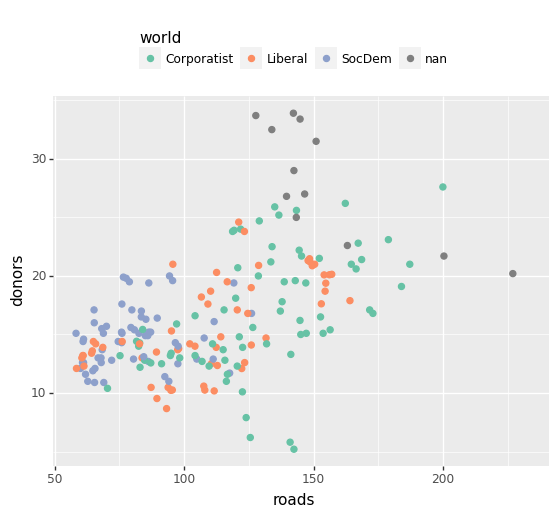

<ggplot: (323560445)>

In [16]:
# Figure 8.7a 
# Note the "nan' entries at the top & right in gray
# In the book, these are rendered transparently, so while there
# is a legend entry and the chart is sized to accommodate them, 
# the points are not visible

p = ggplot(data = organdata,
           mapping = aes(x = 'roads', y = 'donors', color = 'world'))

p + geom_point(size = 2) + \
    scale_color_brewer(type = 'qual', palette = 'Set2') + \
    theme (legend_position = 'top')

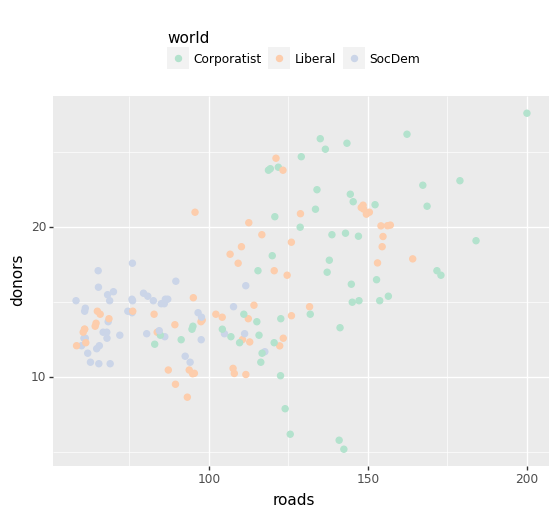

<ggplot: (323513375)>

In [17]:
# Figure 8.7b -- here we remove the na values
# Note how the figure size contracts

p = ggplot(data = organdata.dropna(),
           mapping = aes(x = 'roads', y = 'donors', color = 'world'))

p + geom_point(size = 2) + \
    scale_color_brewer(type = 'qual', palette = 'Pastel2') + \
    theme (legend_position = 'top')

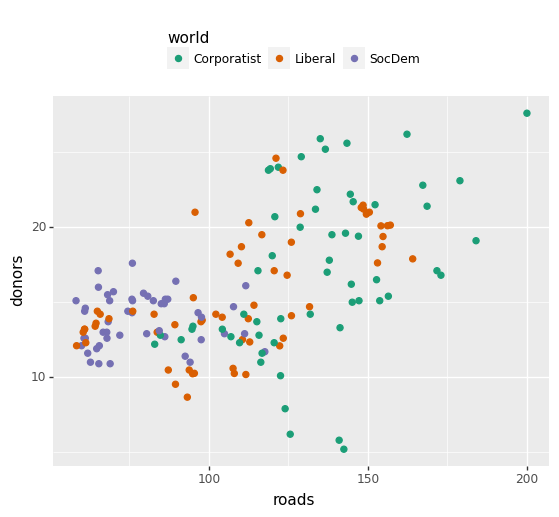

<ggplot: (323677434)>

In [18]:
# Figure 8.7c

p = ggplot(data = organdata.dropna(),
           mapping = aes(x = 'roads', y = 'donors', color = 'world'))

p + geom_point(size = 2) + \
    scale_color_brewer(type = 'qual', palette = 'Dark2') + \
    theme (legend_position = 'top')

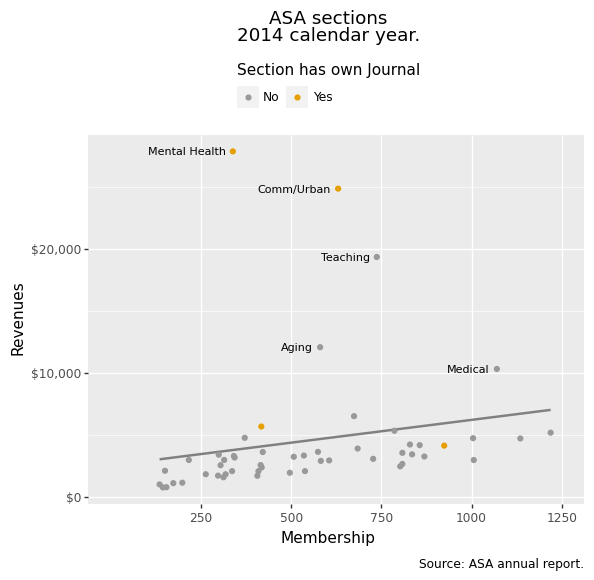

<ggplot: (323653458)>

In [19]:
# Figure 8.8

cb_palette = ("#999999", "#E69F00", "#56B4E9", "#009E73",
              "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p4 + scale_color_manual(values = cb_palette)


In [20]:
# The color demonstration using dichromat (figure 8.9) uses a lot of R-specific packages, 
# so just use rpy2, at least to generate the color table

from rpy2.robjects.packages import importr

%load_ext rpy2.ipython

# Import the relevant libraries

dplyr = importr('dplyr')
tibble = importr('tibble')
dichromat = importr('dichromat')
brewer = importr('RColorBrewer')
socviz = importr('socviz')

# A tibble: 5 × 4
  Default Deuteronopia Protanopia Tritanopia
  <chr>   <chr>        <chr>      <chr>     
1 #66C2A5 #AEAEA7      #BABAA5    #82BDBD   
2 #FC8D62 #B6B661      #9E9E63    #F29494   
3 #8DA0CB #9C9CCB      #9E9ECB    #92ABAB   
4 #E78AC3 #ACACC1      #9898C3    #DA9C9C   
5 #A6D854 #CACA5E      #D3D355    #B6C8C8   


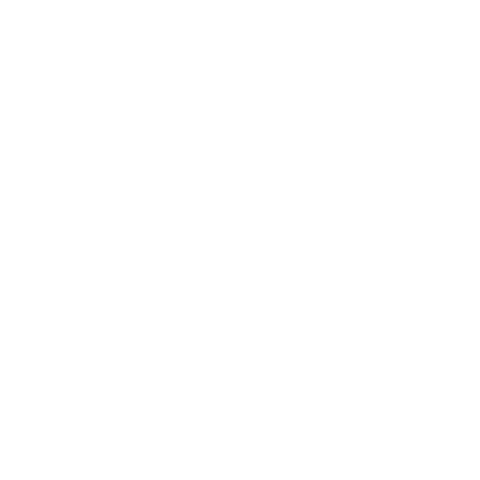

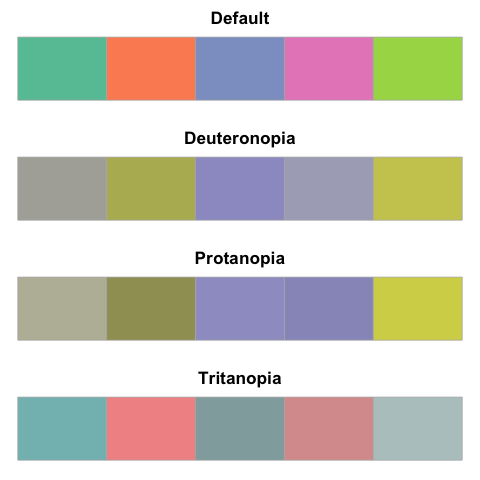

In [21]:
%%R -o color_table

# Figure 8.9 -- using rpy2
# Note that color_comp inserts a lot of blank space before the chart, for some reason

library(dplyr)
library(tibble)
library(RColorBrewer)
library(dichromat)
library(socviz)

Default <- brewer.pal(5, "Set2")

types <- c("deutan", "protan", "tritan")
names(types) <- c("Deuteronopia", "Protanopia", "Tritanopia")

color_table <- types %>%
    purrr::map(~ dichromat(Default, .x)) %>%
    as_tibble() %>%
    add_column(Default, .before = TRUE)

print(color_table)

# in matplotlib we'd use color bars for this
color_comp(color_table)

In [22]:
color_table  # This is the color table returned from the R cell above


,Default,Deuteronopia,Protanopia,Tritanopia
1,#66C2A5,#AEAEA7,#BABAA5,#82BDBD
2,#FC8D62,#B6B661,#9E9E63,#F29494
3,#8DA0CB,#9C9CCB,#9E9ECB,#92ABAB
4,#E78AC3,#ACACC1,#9898C3,#DA9C9C
5,#A6D854,#CACA5E,#D3D355,#B6C8C8


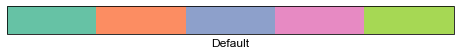

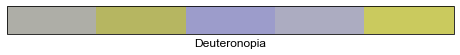

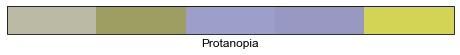

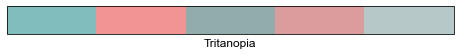

In [23]:
# To replicate the color_comp function using python, 
# use matplotlib's color bar, as here

for colortype in("Default", "Deuteronopia", "Protanopia", "Tritanopia"):
    
    fig, ax = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.5)

    cmap = (mpl.colors.ListedColormap(list(color_table[colortype])))

    bounds = range(6)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
        cax=ax,
        boundaries=bounds,  # Adding values for extensions.
        spacing='proportional',
        orientation='horizontal',
        label=colortype
    )
    ax.set_xticks([], [])
    

### 8.2 Layer color and text together

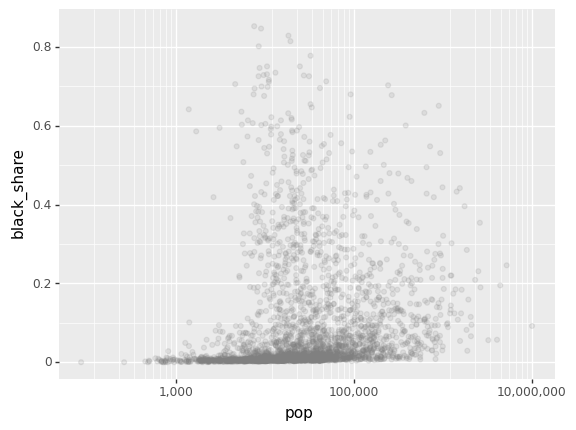

<ggplot: (327285565)>

In [24]:
# Figure 8.10

# Convert percent to fraction
county_data['black_share'] = county_data['black'] / 100

p = ggplot(data = county_data[county_data['flipped'] == "No"],
           mapping = aes(x = 'pop',
                         y = 'black_share'))

(p + geom_point(alpha = 0.15, color = "gray") +
     scale_x_log10(labels = comma_format())
)


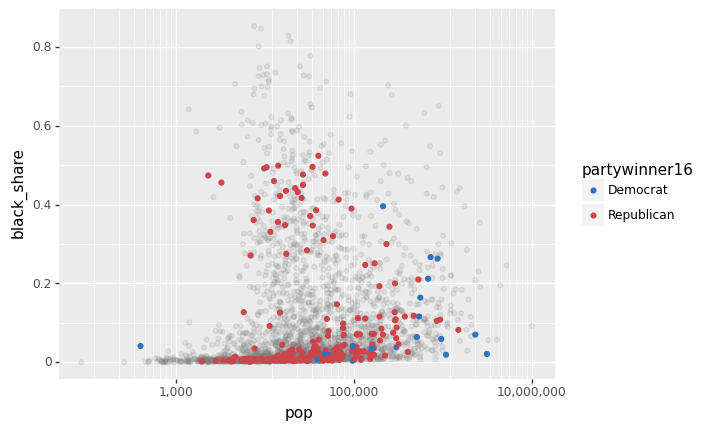

<ggplot: (327363054)>

In [25]:
# Figure 8.11

# Democrat Blue and Republican Red
party_colors = ("#2E74C0", "#CB454A")


(p + geom_point(alpha = 0.15, color = "gray") +
     scale_x_log10(labels = comma_format()) +
 
     geom_point(data = county_data[county_data['flipped'] == "Yes"],
                mapping = aes(x = 'pop', y = 'black_share',
                              color = 'partywinner16')) +
     scale_color_manual(values = party_colors)
)


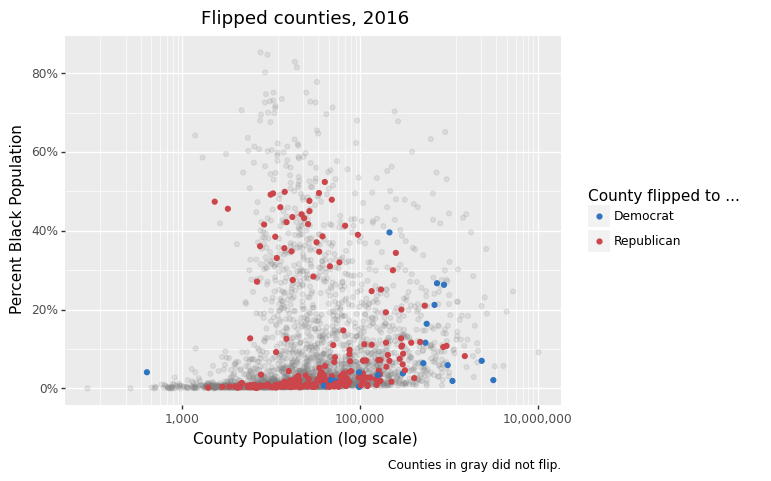

<ggplot: (327447543)>

In [26]:
# Figure 8.12

(p + geom_point(alpha = 0.15, color = "gray") +
     scale_x_log10(labels = comma_format()) +
 
     geom_point(data = county_data[county_data['flipped'] == "Yes"],
                mapping = aes(x = 'pop', y = 'black_share',
                              color = 'partywinner16')) +
     scale_color_manual(values = party_colors) +
 
     scale_y_continuous(labels = percent_format()) +
     labs(color = "County flipped to ... ",
          x = "County Population (log scale)",
          y = "Percent Black Population",
          title = "Flipped counties, 2016",
          caption = "Counties in gray did not flip.")

)


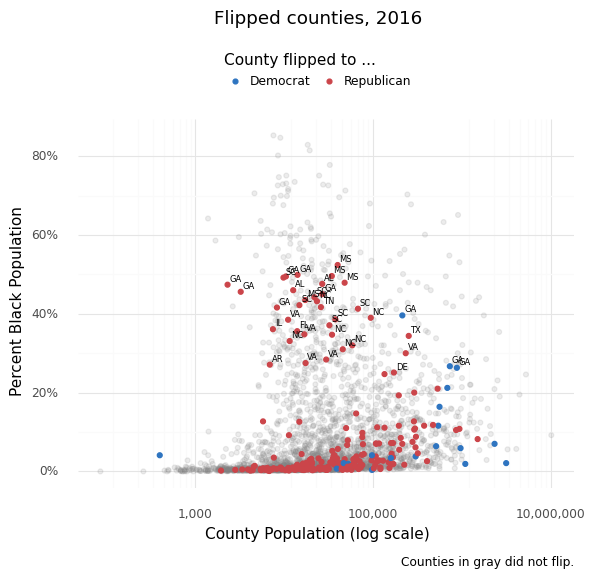

<ggplot: (327519061)>

In [27]:
# Figure 8.13
# Note: we insert newlines (\n) to get desired spacing between
# title & legend, and x-title & caption, respectively

p4 = \
(p + geom_point(alpha = 0.15, color = "gray") +
     scale_x_log10(labels = comma_format()) +
 
     geom_point(data = county_data[county_data['flipped'] == "Yes"],
                mapping = aes(x = 'pop', y = 'black_share',
                              color = 'partywinner16')) +
     scale_color_manual(values = party_colors) +
 
     scale_y_continuous(labels = percent_format()) +
     labs(color = "County flipped to ... ",
          x = "County Population (log scale)",
          y = "Percent Black Population",
          title = "Flipped counties, 2016\n\n\n\n\n",
          caption = "\nCounties in gray did not flip.") +

     geom_text(data = county_data[(county_data['flipped'] == "Yes") &
                                   (county_data['black']  > 25)],
               mapping = aes(x = 'pop',
                             y = 'black_share',
                             label = 'state'), 
               ha = 'left', nudge_x = 0.02, nudge_y = 0.015, size = 6) +

     theme_minimal() +
     theme(legend_position = "top")
) 

p4

### 8.3 Change the appearance of plots with themes

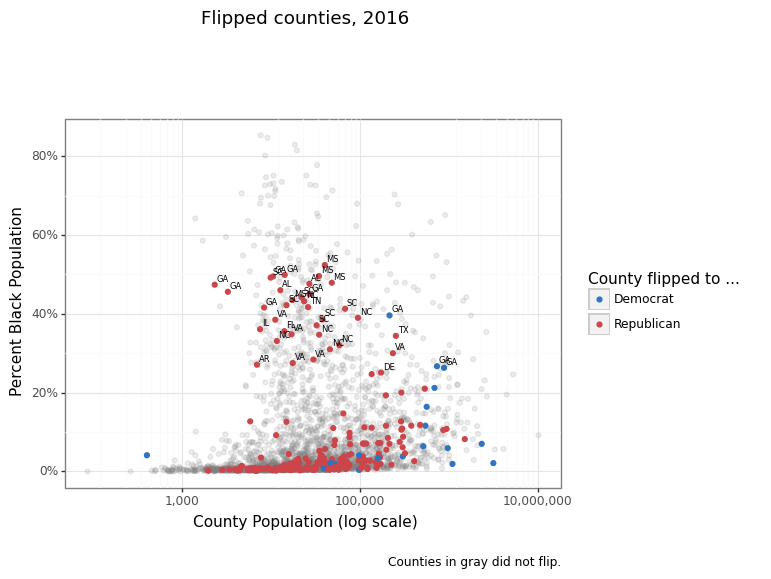

<ggplot: (327550046)>

In [28]:
# Trying out themes (figures not shown in text)
# (set_theme by itself, as used in the book, does not seem to work in plotnine)

# Note that the legend location we specified in creating p4
# is trumped by the theme setting here, since legend_positioning is part of theming

p4 + theme_bw()


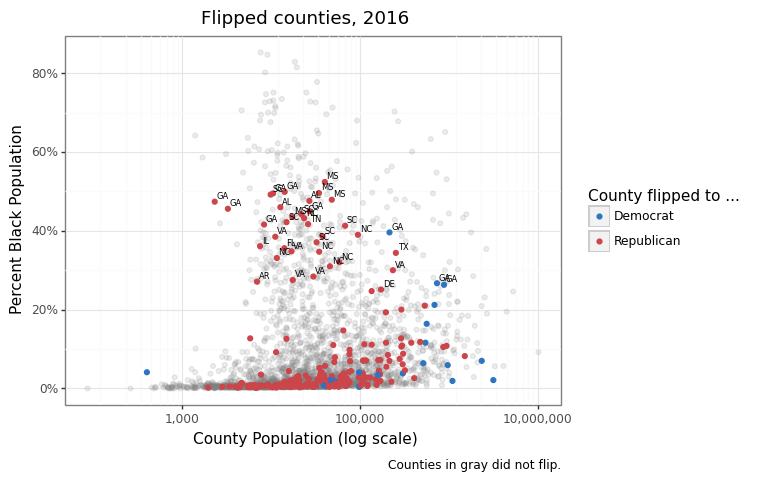

<ggplot: (323560379)>

In [29]:
# Update p4 to take the theme settings out, along with the extra newlines

p4 = \
(p + geom_point(alpha = 0.15, color = "gray") +
     scale_x_log10(labels = comma_format()) +
 
     geom_point(data = county_data[county_data['flipped'] == "Yes"],
                mapping = aes(x = 'pop', y = 'black_share',
                              color = 'partywinner16')) +
     scale_color_manual(values = party_colors) +
 
     scale_y_continuous(labels = percent_format()) +
     labs(color = "County flipped to ... ",
          x = "County Population (log scale)",
          y = "Percent Black Population",
          title = "Flipped counties, 2016",
          caption = "Counties in gray did not flip.") +

     geom_text(data = county_data[(county_data['flipped'] == "Yes") &
                                   (county_data['black']  > 25)],
               mapping = aes(x = 'pop',
                             y = 'black_share',
                             label = 'state'), 
               ha = 'left', nudge_x = 0.02, nudge_y = 0.015, size = 6)
)

p4 + theme_bw() + \
     theme(legend_position = "right")


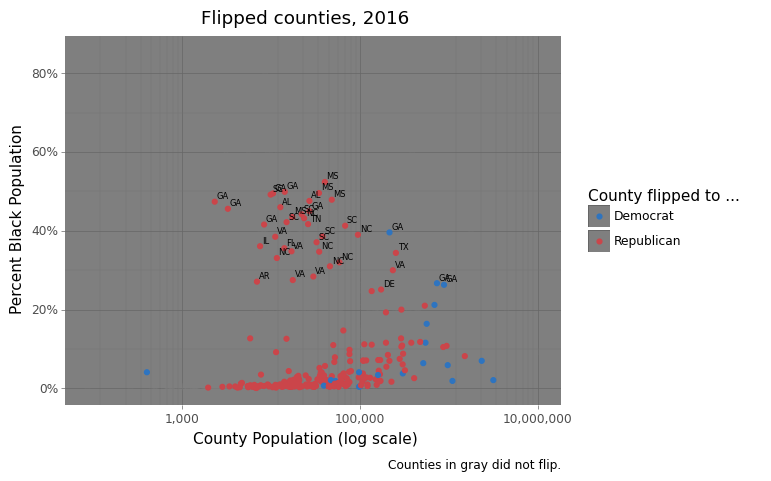

<ggplot: (327527813)>

In [30]:
# Trying out themes (figures not shown in text) -- continued

p4 + theme_dark() + \
     theme(legend_position = "right")


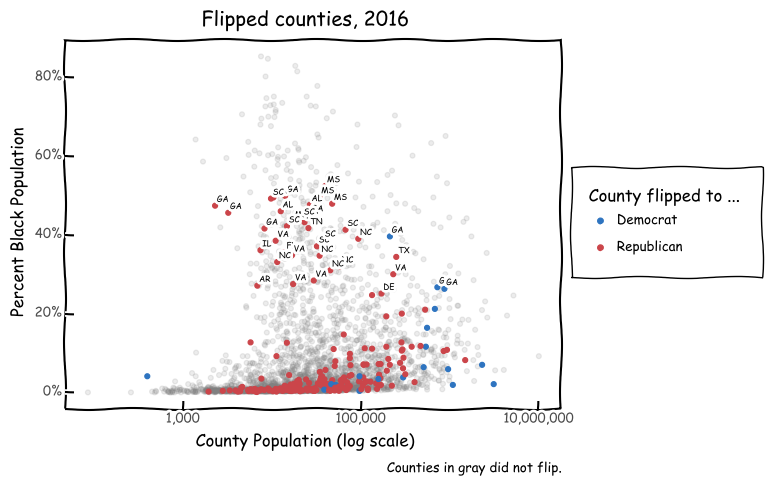

<ggplot: (327518386)>

In [31]:
# Trying out themes (figures not shown in text) -- continued

p4 + theme_xkcd() + \
     theme(legend_position = "right")


#### A note on themes

There is no direct analog to `ggthemes` for `plotnine`, so it would take a little extra work to recreate figure 8.14 (which applies the _Economist_ and _WSJ_ themes). However, doing so is relatively straightforward:

- the source code for the `ggthemes` themes is available at https://github.com/jrnold/ggthemes/tree/main/R (for instance, economist.R)
- `plotnine` has some pre-defined themes (including those shown above) that can be used to model which changes, if any, are needed to port the .R themes to `plotnine`


findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


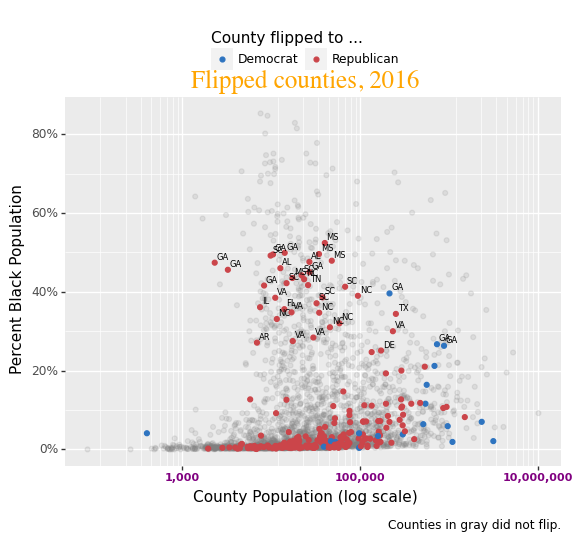

<ggplot: (327658054)>

In [32]:
# Figure 8.15: using theme to change colors of title & x-axis labels

# Note that not all font families are available in all set-ups
# Here Courier is missing

p4 + theme(legend_position = "top",
           plot_title = element_text(size=18,
                                     lineheight=.5,
                                     family="Times",
                                     face="bold.italic",
                                     colour="orange"),
           axis_text_x = element_text(size=8,
                                      family="Courier",
                                      face="bold",
                                      color="purple"))

### 8.4 Use theme elements in a substantive way

In [33]:
# Get the set of years of interest (1972-2016 in 4s, except 1992 replaced by 1993)

# Note that python's range function does not include the last element if it matches range end
yrs = list(range(1972, 1992, 4)) + [1993,] + list(range(1996, 2020, 4))

yrs

[1972, 1976, 1980, 1984, 1988, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

In [34]:
# Get mean age by year

mean_age = gss_lon[(~gss_lon['age'].isna()) & (gss_lon['year'].isin(yrs))].groupby('year').mean()
mean_age = mean_age.reset_index()
mean_age = mean_age[['year', 'age']]

mean_age['age'] = round(mean_age['age'])

mean_age['year'] = mean_age['year'].astype(int)
mean_age['age'] = mean_age['age'].astype(int)
mean_age['y'] = 0.3

In [35]:
mean_age

,year,age,y
0,1972,45,0.3
1,1976,45,0.3
2,1980,45,0.3
3,1984,44,0.3
4,1988,45,0.3
5,1993,46,0.3
6,1996,45,0.3
7,2000,46,0.3
8,2004,46,0.3
9,2008,48,0.3


In [36]:
# Assign label locations as entries in a dataframe

yr_labs = pd.DataFrame([(85, 0.8, year) for year in yrs], columns = ('x', 'y', 'year'))
yr_labs

,x,y,year
0,85,0.8,1972
1,85,0.8,1976
2,85,0.8,1980
3,85,0.8,1984
4,85,0.8,1988
5,85,0.8,1993
6,85,0.8,1996
7,85,0.8,2000
8,85,0.8,2004
9,85,0.8,2008


In [37]:
# Set up the overall plot (without theme fine-tuning)

p = ggplot(data = gss_lon[gss_lon['year'].isin(yrs)],
           mapping = aes(x = 'age'))

p1 = \
(p + geom_density(fill = "gray", # color = '',
                  alpha = 0.9, 
                  mapping = aes(y = '..scaled..')) +
     geom_vline(data = mean_age,
                mapping = aes(xintercept = 'age'), 
                color = "white", size = 0.5) +
     geom_text(data = mean_age,
               mapping = aes(x = 'age', y = 'y', label = 'age'), 
               nudge_x = 1.5,
               color = "white", size = 10, ha = 'left') +
     geom_text(data = yr_labs,
               mapping = aes(x = 'x', y = 'y', label = 'year')) +
     facet_grid(('year', '.'))
)


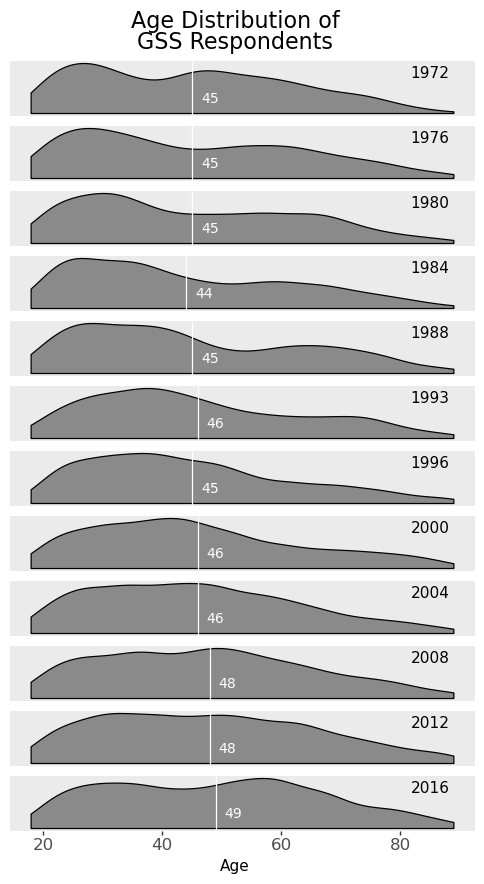

<ggplot: (327858667)>

In [38]:
# Figure 8.16

(p1 + theme(panel_spacing = 0.1) +
      theme(plot_title = element_text(size = 16),
            axis_text_x= element_text(size = 12),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            strip_background = element_blank(),
            strip_text_y = element_blank(),
            panel_grid_major = element_blank(),
            panel_grid_minor = element_blank(),
            panel_border = element_blank(),
            figure_size = (6, 10)) +
      labs(x = "Age", 
           y = '',
           title = "Age Distribution of\nGSS Respondents")
)


In [39]:
gss_lon['year'] = gss_lon['year'].astype(int)

Text(0.5, 104.0, 'Age')

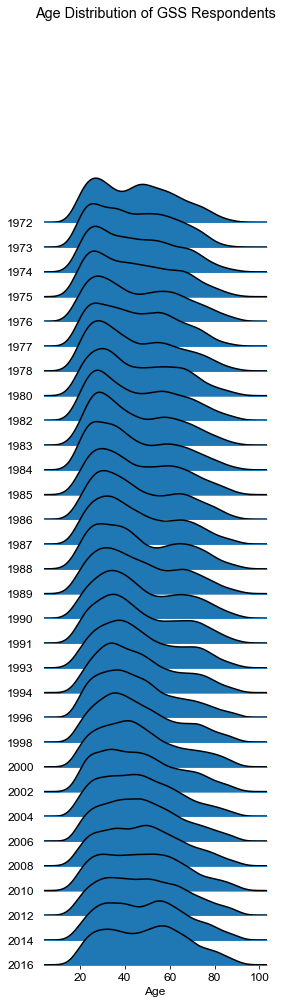

In [40]:
# Figure 8.17 
# Note: too much blank space between title and first plot -- figure out why

fig, axes = joypy.joyplot(gss_lon.dropna(subset = ['age',]), 
                          column = 'age',
                          by = "year",
                          overlap = 3,
                          figsize = (4, 14),
                          ylim=(0, 0.1),
                          title = "Age Distribution of GSS Respondents")

axes[-1].set_xlabel('Age')

### 8.5 Case studies

#### 8.5.1 Two y-axes

In [41]:
fredts_m = pd.melt(fredts[['date', 'sp500_i', 'monbase_i']],
                   id_vars = 'date',
                   value_vars = ['sp500_i', 'monbase_i'],
                   var_name = 'series', value_name = 'score')
fredts_m.head()

,date,series,score
0,2009-03-11,sp500_i,100.000000
1,2009-03-18,sp500_i,110.054831
2,2009-03-25,sp500_i,114.701154
3,2009-04-01,sp500_i,116.130792
4,2009-04-08,sp500_i,119.224034


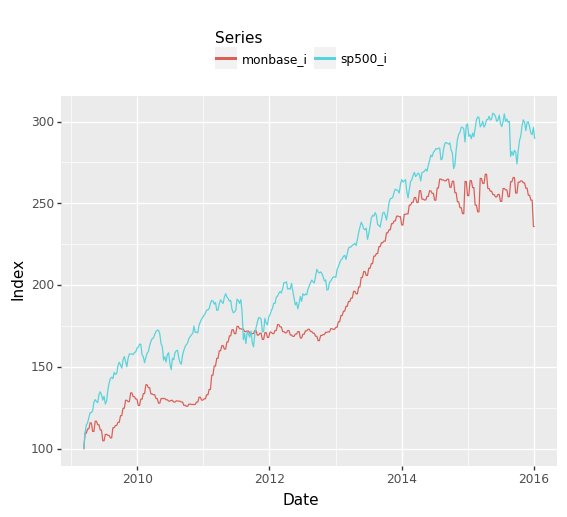

<ggplot: (323654584)>

In [42]:
# First of two figures to combine.
# In order for that to work, mapping needs to specify dataframe name

p = ggplot(data = fredts_m,
           mapping = aes(x = fredts_m['date'], y = fredts_m['score'],
                         group = fredts_m['series'],
                         color = fredts_m['series']))

pairedplot = \
(p + geom_line() + 
     scale_x_datetime(breaks = date_breaks('2 years'), 
                      labels = date_format('%Y')) +
     theme(legend_position = "top") +
     labs(x = "Date",
          y = "Index",
          color = "Series")
)

pairedplot

In [43]:
fredts['diff'] = fredts['sp500_i'] - fredts['monbase_i']

In [44]:
fredts_m.head()

,date,series,score
0,2009-03-11,sp500_i,100.000000
1,2009-03-18,sp500_i,110.054831
2,2009-03-25,sp500_i,114.701154
3,2009-04-01,sp500_i,116.130792
4,2009-04-08,sp500_i,119.224034


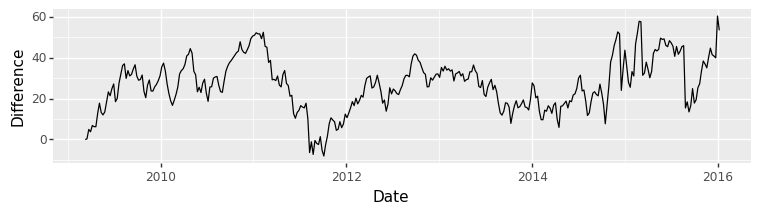

<ggplot: (327546634)>

In [45]:
# Note: in the mapping, specify dataframe name (as above)

p = ggplot(data = fredts,
           mapping = aes(x = fredts['date'], y = fredts['diff'], group = 1))

diffplot = \
(p + geom_line() +
     scale_x_datetime(breaks = date_breaks('2 years'), 
                      labels = date_format('%Y')) +
     labs(x = "Date",
          y = "Difference") + 
     theme(figure_size = (9, 2))
)

diffplot

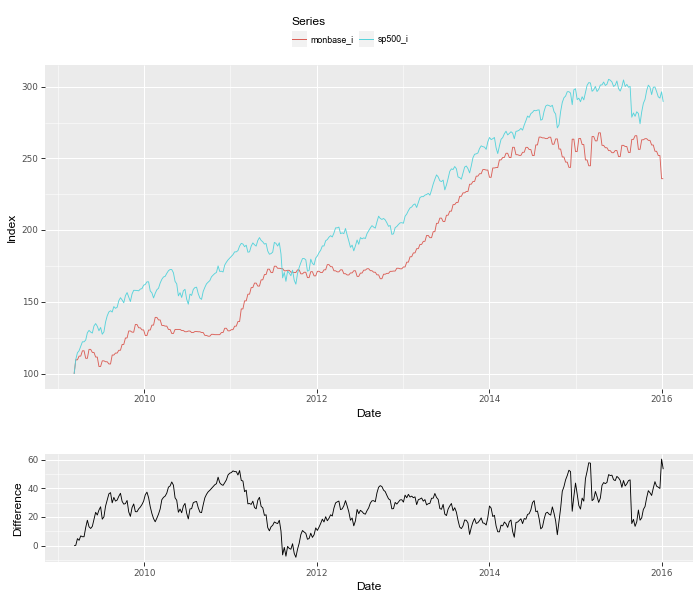

In [46]:
# Figure 8.20
# Note: for this to work, the mappings in the individual figures
# need to specify the name of the df they belong to (see above)

g1 = pw.load_ggplot(pairedplot, figsize=(9, 4.5))
g2 = pw.load_ggplot(diffplot, figsize=(9, 1.5))
g1on2 = g1/g2
g1on2.savefig()

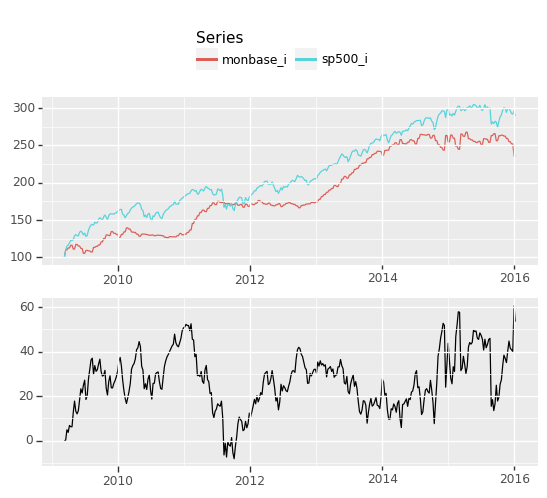

In [47]:
# Figure 8.20 - alternative

# This also works, but it is less obvious how to adjust
# the sizes of the separate figures

from matplotlib import gridspec
from plotnine import data

# Empty plotnine figure to place the subplots on. Needs junk data (for backend "copy" reasons).
fig = (ggplot() + 
       geom_blank(data = fredts) +
       theme_void()).draw()

# Create gridspec for adding subpanels to the blank figure
gs = gridspec.GridSpec(2,1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

# Add subplots to the figure
_ = pairedplot._draw_using_figure(fig, [ax1])
_ = diffplot._draw_using_figure(fig, [ax2])

fig.show()

#### 8.5.2 Redrawing a bad slide

In [48]:
yahoo['Year'] = yahoo['Year'].astype(int)

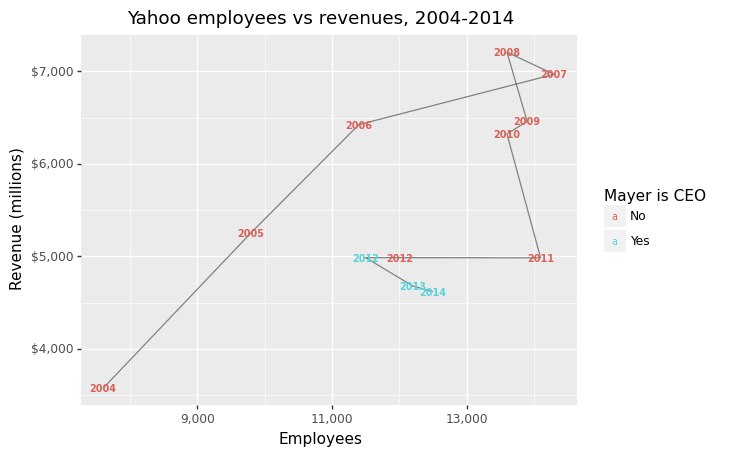

<ggplot: (328441625)>

In [49]:
# Figure 8.22

p = ggplot(data = yahoo,
           mapping = aes(x = 'Employees', y = 'Revenue'))

(p + geom_path(color = "gray") +
     geom_text(aes(color = 'Mayer', label = 'Year'),
               size = 7, fontweight = "bold") +
    theme(legend_position = "right") +
    labs(color = "Mayer is CEO",
         x = "Employees", 
         y = "Revenue (millions)",
         title = "Yahoo employees vs revenues, 2004-2014") +
    scale_y_continuous(labels = currency_format(digits=0, big_mark=',')) +
    scale_x_continuous(labels = comma_format())
)

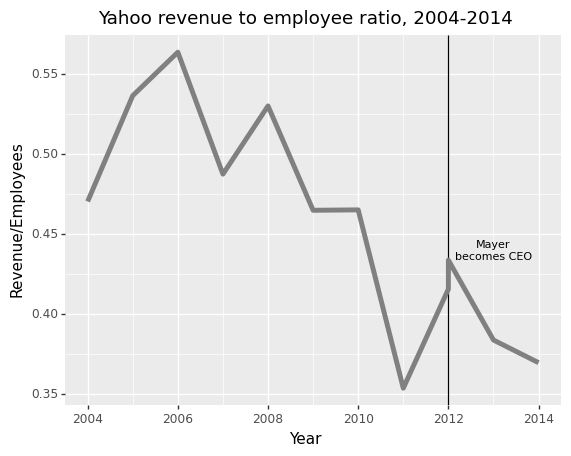

<ggplot: (327728098)>

In [50]:
# Figure 8.23
# Note that there should be 2 points for 2012, as here (the book drops the first)

yahoo['revperemp'] = yahoo['Revenue'] / yahoo['Employees']

p = ggplot(data = yahoo,
           mapping = aes(x = 'Year', y = 'revperemp'))

(p + geom_vline(xintercept = 2012) +
     geom_line(color = "gray", size = 2) +
     annotate("text", x = 2013, y = 0.44,
              label = "Mayer\nbecomes CEO", size = 8) +
     labs(x = "Year",
          y = "Revenue/Employees",
          title = "Yahoo revenue to employee ratio, 2004-2014")
)

#### 8.5.3 Saying no to pie

In [51]:
studebt.head()  # Inspect the studebt df

,Debt,type,pct,Debtrc
0,Under $5,Borrowers,20,Under $5
1,$5-$10,Borrowers,17,$5-$10
2,$10-$25,Borrowers,28,$10-$25
3,$25-$50,Borrowers,19,$25-$50
4,$50-$75,Borrowers,8,$50-$75


In [52]:
studebt['Debt'].unique()

['Under $5', '$5-$10', '$10-$25', '$25-$50', '$50-$75', '$75-$100', '$100-$200', 'Over $200']
Categories (8, object): ['$10-$25', '$100-$200', '$25-$50', '$5-$10', '$50-$75', '$75-$100', 'Over $200', 'Under $5']

In [53]:
# Make debt level categorical in the right order, so it remains sorted correctly
# (current order is alphabetical)

debt_categories = ['Under $5', '$5-$10', '$10-$25', '$25-$50', 
                   '$50-$75', '$75-$100', '$100-$200', 'Over $200']

debt_cat = pd.Categorical(studebt['Debt'], categories=debt_categories)

# assign to a new column in the DataFrame
studebt = studebt.assign(debt_cat = debt_cat)


In [54]:
# Reverse order of borrower/balance (away from the alphabetic)

type_cat = pd.Categorical(studebt['type'], categories = ('Borrowers', 'Balances'))

# assign to a new column in the DataFrame
studebt = studebt.assign(type_cat = type_cat)


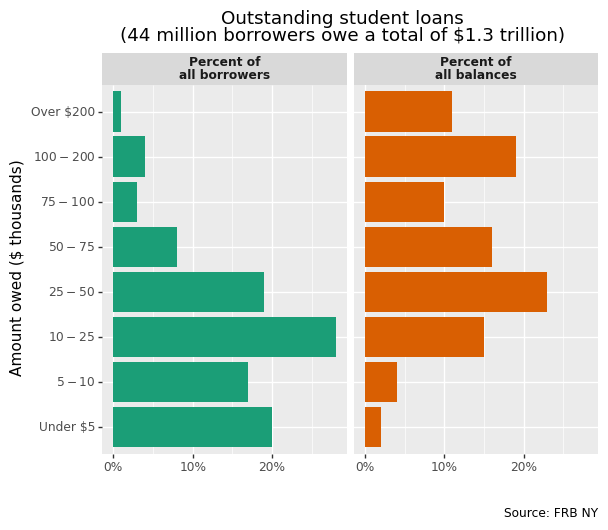

<ggplot: (328530990)>

In [55]:
# Figure 8.25
# Note that the currency formatter strips the $ sign from the intermediate values

studebt['share'] = studebt['pct'] / 100

p = ggplot(data = studebt,
           mapping = aes(x = 'debt_cat', y = 'share', 
                         fill = 'type_cat'))

(p + geom_bar(stat = "identity") +
     scale_fill_brewer(type = "qual", palette = "Dark2") +
     scale_y_continuous(labels = percent_format()) +
     guides(fill = False) +
     theme(strip_text_x = element_text(face = "bold")) +
     labs(x = 'Amount owed ($ thousands)',
          y = '', 
          caption = 'Source: FRB NY',
          title = 'Outstanding student loans\n(44 million borrowers owe a total of $1.3 trillion)') +
     facet_grid(('.', 'type_cat'), labeller = as_labeller({'Borrowers': 'Percent of\nall borrowers',
                                                           'Balances': 'Percent of\nall balances'})) +
     coord_flip()
)

In [56]:
# Reverse order of debt_cat

debt_cat = pd.Categorical(studebt['Debt'], categories = debt_categories[::-1])

# assign to a new column in the DataFrame
studebt = studebt.assign(debt_cat = debt_cat)


In [57]:
# Generate discrete intervals from a continuous colormap

import matplotlib as mpl

cmap = mpl.cm.viridis_r
cmapsize = cmap.N  # generally 256

# extremes are -1 and 256, respectively (i.e. "out of range")
# breaks inbetween must fall in the 0...256 range

nr_breaks = 8
intervalsize = cmapsize / (nr_breaks - 1)

cmap_indices = [-1,] + \
               [round(x * intervalsize) - 1 for x in range(nr_breaks)][1:] + \
               [256,]

color_dict = dict(zip(debt_categories,
                      [mpl.colors.to_hex(cmap(x)) for x in cmap_indices]))

color_dict

{'Under $5': '#fde725',
 '$5-$10': '#a0da39',
 '$10-$25': '#4cc26c',
 '$25-$50': '#1fa187',
 '$50-$75': '#27808e',
 '$75-$100': '#365c8d',
 '$100-$200': '#46337f',
 'Over $200': '#440154'}

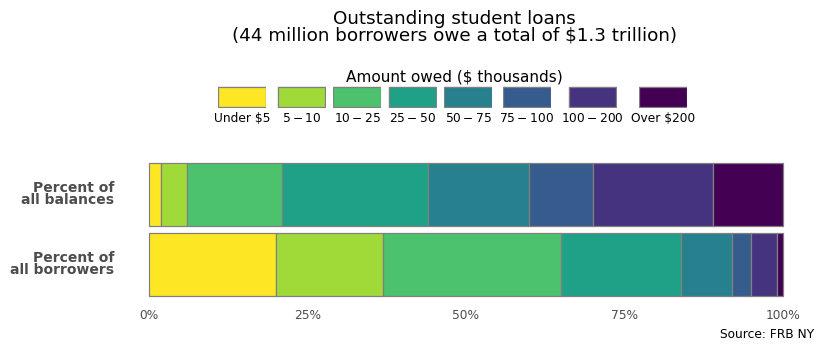

<ggplot: (327768890)>

In [58]:
# Figure 8.26
# Note that the currency formatter strips the $ sign from the intermediate values
# The theme panel background makes the background white, without adding
# a black line all around as in the book

p = ggplot(data = studebt,
           mapping = aes(x = 'type_cat', y = 'share', 
                         fill = 'debt_cat'))

(p + geom_bar(stat = "identity", color = 'gray') +
     scale_x_discrete(labels = ('Percent of\nall borrowers',
                                'Percent of\nall balances')) +
     scale_y_continuous(labels = percent_format()) +
     scale_fill_manual(values = color_dict) + 
     guides(fill = guide_legend(reverse = True,
                                title_position = "top",
                                label_position = "bottom",
                                keywidth = 35,
                                nrow = 1)) +
     labs(x = '', y = '',
          fill = "Amount owed ($ thousands)",
          caption = 'Source: FRB NY',
          title = 'Outstanding student loans\n(44 million borrowers owe a total of $1.3 trillion)\n\n\n\n\n\n') +
     theme(legend_position = "top",
           axis_text_y = element_text(face = "bold", hjust = 1, size = 10),
           axis_ticks_length = 0,
           panel_grid_major_y = element_blank(),
           figure_size = (9, 2),
           panel_background = element_rect(fill = 'white')) +
     coord_flip()
)

### This completes the figures for chapter 8